<a href="https://colab.research.google.com/github/thisisreallife/Medium/blob/master/Comparing_T_tests_under_SRSWOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_ind,t
import scipy.stats as stats
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

## Some Utilities

In [3]:
# Split sample into control and treatment arms equally.
def get_2_bkts(data):
    n = len(data)
    random_numbers = norm.rvs(0,1,n)
    return data[random_numbers<0], data[random_numbers>0]

## T-testing considering sampling ratio of srswor
def ttests_sample_ratio(data_a, data_b, f):
    test_var = np.var(data_a)/len(data_a)*(1-f) + np.var(data_b)/len(data_b)*(1-f)
    z_stats = (np.mean(data_a) - np.mean(data_b))/test_var**0.5
    p_value = 2*(1-norm.cdf(abs(z_stats)))
    return z_stats,p_value

In [58]:
population = norm.rvs(10,20,10000)
population1 = norm.rvs(10,20,10000)
population2 = norm.rvs(10,20,10000)
population2 = population2 + population1.mean() - population2.mean()

In [59]:
population.mean(), population1.mean(), population2.mean()

(10.037889881308939, 9.959013730212103, 9.959013730212103)

In [12]:
# test our ttest_sample_ratio. Our self-define function 
a = norm.rvs(0,1,10000)
b = norm.rvs(0,1,10000)
ttest_ind(a,b,equal_var = False), ttests_sample_ratio(a,b,0), ttests_sample_ratio(a,b,0.5)

(Ttest_indResult(statistic=-1.3442050755853656, pvalue=0.17889732961693808),
 (-1.344272290880334, 0.17886035242173626),
 (-1.9010881052853184, 0.0572904733347408))

## Comparing AA and AB performance in simulation 

Now, we split population into 2 arms equally and test them base on 2 methods(considering sample ratio or not). First, we compare the p_values and t_stats of 1000 testing in AA situation. Then, we repeat in a AB situation.

We use __srs__ to draw 5000 samples from population, and then split into control group(\~2500 samples) and treatment group(\~2500 samples). We perform two sample T-test with/withour considering sampling ratio(f = 0.25).

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'P_values of two testing methods under 50-50 split, in srs situation')

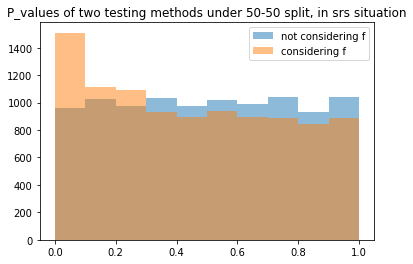

In [62]:
test_result_srs = []
test_result_srswor = []
for i in tqdm(range(10000)):
    # get the sample of experiment
    sample_iter_srs = np.random.choice(population, 5000, replace = True)
    # sample_iter_srswor = np.random.choice(population, 5000, replace = False)
    # get the sample of each experiment version
    con_srs = np.random.choice(population, 2500, replace = True)
    trt_srs = np.random.choice(population, 2500, replace = True)
    # con_srswor, trt_srswor = get_2_bkts(sample_iter_srswor)
    # conduct t-tests
    test_result_srs.append(ttests_sample_ratio(con_srs, trt_srs, f = 0))
    test_result_srswor.append(ttests_sample_ratio(con_srs, trt_srs, f = 0.25))
plt.hist([i[1] for i in test_result_srs], alpha = 0.5)
plt.hist([i[1] for i in test_result_srswor], alpha = 0.5)
plt.legend(['not considering f', 'considering f'])
plt.title('P_values of two testing methods under 50-50 split, in srs situation')

It shows that we should not considering sampling ratio f in __srs scenario__, because p_values of `considering f` is not uniform.

In [ ]:
# stats.kstest([i[1] for i in test_result_srs], lambda x: stats.uniform.cdf(x,0,1)),\
# stats.kstest([i[1] for i in test_result_srswor], lambda x: stats.uniform.cdf(x,0,1))

In [ ]:
# stats.kstest([i[0] for i in test_result_srs], lambda x: stats.norm.cdf(x, 0,1)),\
# stats.kstest([i[0] for i in test_result_srswor], lambda x: stats.norm.cdf(x, 0,1))

We use srswor to draw 5000 samples from population, and then split into control group(\~2500 samples) and treatment group(\~2500 samples). We perform two sample T-test with/withour considering sampling ratio(f = 0.25).

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'P_values of two testing methods under 50-50 split, in srswor situation')

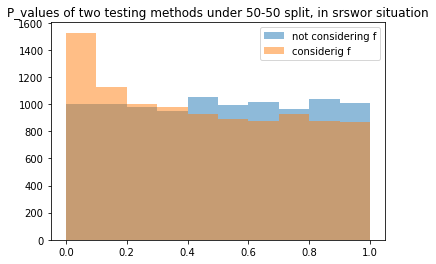

In [63]:
test_result_srs = []
test_result_srswor = []
for i in tqdm(range(10000)):
    # get the sample of experiment
    sample_iter_srswor = np.random.choice(population, 5000, replace = False) # N_population = 10000, n_control + n_treatment = 5000

    # get the sample of each experiment version

    con_srswor, trt_srswor = get_2_bkts(sample_iter_srswor) # n_control/n_treatment = 2500, f = 0.25. This is another srswor
    # conduct t-tests
    test_result_srs.append(ttests_sample_ratio(con_srswor, trt_srswor, f = 0))
    test_result_srswor.append(ttests_sample_ratio(con_srswor, trt_srswor, f = 0.25))

plt.hist([i[1] for i in test_result_srs], alpha = 0.5)
plt.hist([i[1] for i in test_result_srswor], alpha = 0.5)
plt.legend(['not considering f', 'considerig f'])
plt.title('P_values of two testing methods under 50-50 split, in srswor situation')

It shows that we should not considering sampling ratio f in __srswor scenario__, because p_values of `considering f` is not uniform.

# In one sample scenario, we need sampling ratio f to estimate variance of sampling mean.

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'P_values of two testing methods under 50-50 split, in srswor situation')

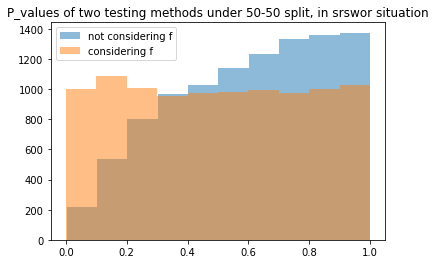

In [64]:
test_result_srs = []
test_result_srswor = []
for i in tqdm(range(10000)):
    # 从10k总体中, 抽取5k个样本. 抽样比f = 0.5
    sample_iter_srswor = np.random.choice(population, 5000, replace = False) 

    # conduct t-tests. 检验样本的均值是否!=10
    ## 计算不考虑抽样比的结果
    t_stats_not_considering_f = (sample_iter_srswor.mean()-10)/np.std(sample_iter_srswor)*np.sqrt(len(sample_iter_srswor))
    p_value_not_considering_f = 2*(1 - norm.cdf(abs(t_stats_not_considering_f)))

    ## 计算考虑抽样比的结果
    f = 0.5
    var = np.var(sample_iter_srswor)/len(sample_iter_srswor)*(1-f) # 带有抽样比
    t_stats_considering_f = (sample_iter_srswor.mean()-population.mean())/var**0.5
    p_value_considering_f = 2*(1 - norm.cdf(abs(t_stats_considering_f))) 
    
    # 输出检验的统计量和p值
    test_result_srs.append((t_stats_not_considering_f, p_value_not_considering_f))
    test_result_srswor.append((t_stats_considering_f, p_value_considering_f))

# 发现考虑抽样比的时候, p值是服从均匀分布的. 所以应该考虑抽样比
plt.hist([i[1] for i in test_result_srs], alpha = 0.5)
plt.hist([i[1] for i in test_result_srswor], alpha = 0.5)
plt.legend(['not considering f', 'considering f'])
plt.title('P_values of two testing methods under 50-50 split, in srswor situation')

In [26]:
np.max(population) - np.min(population),np.max(population1) - np.min(population1),np.max(population2) - np.min(population2)

(15.710326580845631, 18.31430923819282, 16.613331023042342)

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'P_values of two testing methods under 50-50 split, in srswor situation')

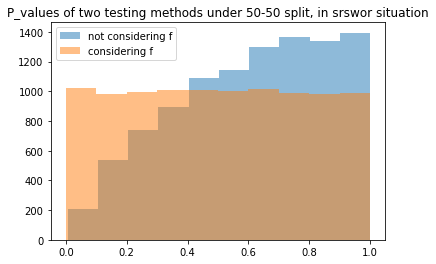

In [67]:
l1 = []
l2 = []
l3 = []

for i in tqdm(range(10000)):
    # 从10k总体中, 抽取5k个样本. 抽样比f = 0.5
    con_srswor = np.random.choice(population1, 5000, replace = False) 
    trt_srswor = np.random.choice(population1, 5000, replace = False) 

    # conduct t-tests. 检验样本的均值是否相等
    ## 计算不考虑抽样比的结果
    l1.append(ttests_sample_ratio(con_srswor, trt_srswor, f = 0))
    l2.append(ttests_sample_ratio(con_srswor, trt_srswor, f = 0.5))

    # 单样本
    data = np.random.choice(population, 5000, replace = False) 
    var = np.var(data)/len(data)*(1-0.5) # 带有抽样比
    t_stats_considering_f = (data.mean()-population.mean())/var**0.5
    p_value_considering_f = 2*(1 - norm.cdf(abs(t_stats_considering_f))) 
    l3.append((t_stats_considering_f, p_value_considering_f))

# 发现考虑抽样比的时候, p值是服从均匀分布的. 所以应该考虑抽样比
# plt.subplot(1,3,1)
plt.hist([i[1] for i in l1], alpha = 0.5)
# plt.subplot(1,3,2)
plt.hist([i[1] for i in l2], alpha = 0.5)
# plt.subplot(1,3,3)
# plt.hist([i[1] for i in l3], alpha = 0.5)
plt.legend(['not considering f', 'considering f'])
plt.title('P_values of two testing methods under 50-50 split, in srswor situation')


In [28]:
ttests_sample_ratio(con_srswor, trt_srswor, f = 0)

(1.192578633183784, 0.23303443803092083)

In [29]:
ttests_sample_ratio(con_srswor, trt_srswor, f = 0.5)

(1.6865608772448757, 0.09168782002294806)

In [30]:
con_srswor.mean() - trt_srswor.mean()

0.04671205981328974

In [35]:
(con_srswor.var()/5000*0.5 + trt_srswor.var()/5000*0.5)**0.5

0.02769663428313208

In [38]:
con_srswor.var(),trt_srswor.var()

(3.7030152293471175, 3.9680202767885566)

In [39]:
population1.var(),population2.var()

(3.8604150738643237, 4.030157899041065)